<a href="https://www.kaggle.com/code/aleksandrmorozov123/computer-vision-with-tensorflow-and-keras?scriptVersionId=170838691" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Get the data**

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

2024-04-07 16:51:20.113821: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-07 16:51:20.114052: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-07 16:51:20.284602: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


**Exploring the data**

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_images.shape

(60000, 28, 28)

In [4]:
len (train_labels)

60000

In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len (test_labels)

10000

**Preprocess the data**

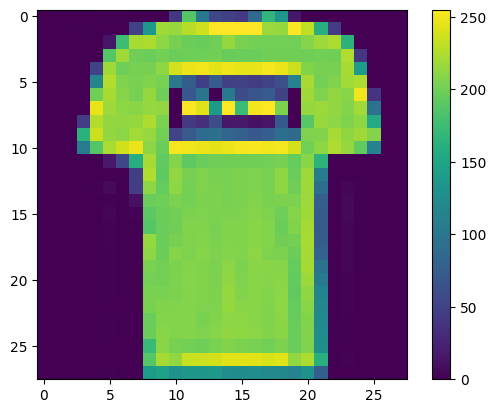

In [8]:
plt.figure ()
plt.imshow (train_images [1])
plt.colorbar ()
plt.grid (False)
plt.show ()

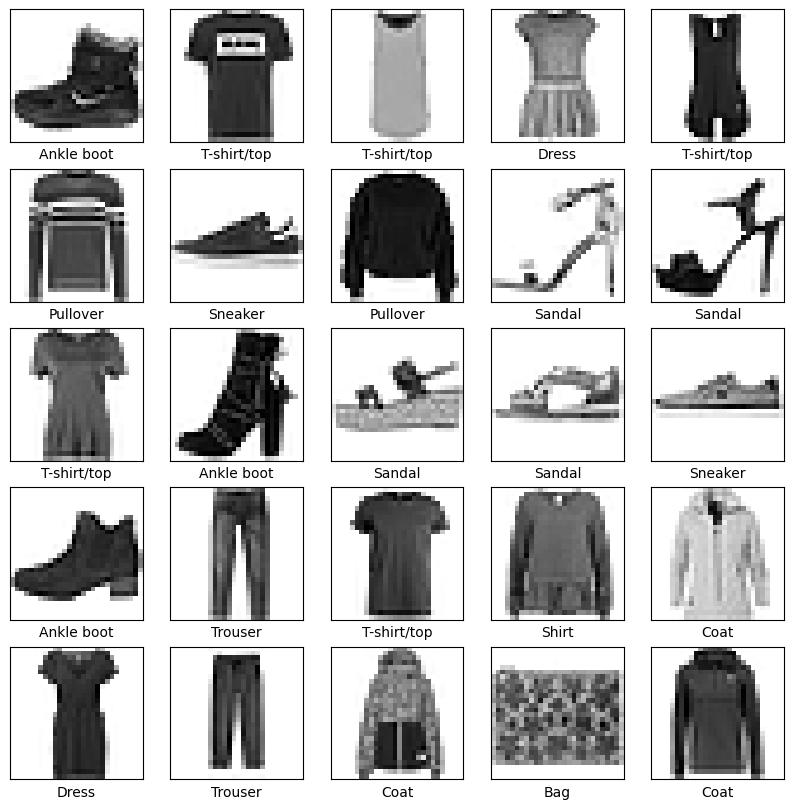

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure (figsize = (10, 10))
for i in range (25):
    plt.subplot (5, 5, i + 1)
    plt.xticks ([])
    plt.yticks ([])
    plt.grid (False)
    plt.imshow (train_images [i], cmap = plt.cm.binary)
    plt.xlabel (class_names [train_labels [i]])
plt.show ()

**Build the model**

In [10]:
model = tf.keras.Sequential ([
    tf.keras.layers.Flatten (input_shape = (28, 28)),
    tf.keras.layers.Dense (128, activation = 'relu'),
    tf.keras.layers.Dense (10)
])
model.compile (optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy (from_logits = True),
              metrics = ['accuracy'])

model.summary ()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

**Feed the model**

In [11]:
model.fit (train_images, train_labels, epochs = 20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7834 - loss: 0.6242
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8621 - loss: 0.3841
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8771 - loss: 0.3393
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8831 - loss: 0.3177
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8897 - loss: 0.2961
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8953 - loss: 0.2816
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9023 - loss: 0.2656
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9037 - loss: 0.2556
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9071 - loss: 0.2496
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9129 - loss: 0.2338
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9136 - loss: 0.2307
Epoch 12/20
1875/1875 ━━━━━━

**Evaluate accuracy**

In [12]:
test_loss, test_acc = model.evaluate (test_images, test_labels, verbose = 2)
print ('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8858 - loss: 0.3635

Test accuracy: 0.8858000040054321


**Demonstrate overfitting**

In [13]:
# setup
from tensorflow.keras import layers
from tensorflow.keras import regularizers

!pip install git+https://github.com/tensorflow/docs
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

from IPython import display
import pathlib
import shutil
import tempfile
logdir = pathlib.Path (tempfile.mkdtemp ())/'tensorboard_logs'
shutil.rmtree (logdir, ignore_errors = True)

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-71zqg5u0
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-71zqg5u0
  Resolved https://github.com/tensorflow/docs to commit ec3a1b3f9a604c6cd26c7537f2b9fd270a3eedbf
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-docs: filename=tensorflow_docs-2024.3.27.3713-py3-none-any.whl size=186509 sha256=274a8fc490765b9a120398094d4dd02aeb1c7560f888728ae3a568aa0ad27318
  Stored in directory: /tmp/pip-ephem-wheel-cache-alsnj3xa/wheels/86/0f/1e/3b62293c8ffd0fd5a49508e6871cdb7554abe9c62afd35ec53
Successfully built tensorflow-docs


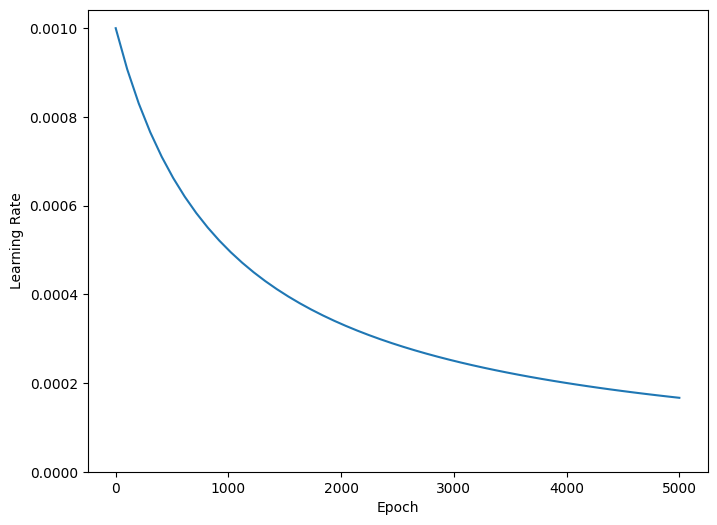

In [14]:
import numpy as np
import keras

N_VALIDATION = int (1e3)
N_TRAIN = int (1e4)
BUFFER_SIZE = int (1e4)
BATCH_SIZE = 500
STEPS_PER_EPOCH = N_TRAIN//BATCH_SIZE
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay (
0.001,
decay_steps = STEPS_PER_EPOCH * 1000,
decay_rate = 1,
staircase = False)

def get_optimizer ():
    return tf.keras.optimizers.Adam (lr_schedule)

step = np.linspace (0, 100000)
lr = lr_schedule (step)
plt.figure (figsize = (8, 6))
plt.plot (step / STEPS_PER_EPOCH, lr)
plt.ylim ([0, max (plt.ylim ())])
plt.xlabel ('Epoch')
_ = plt.ylabel ("Learning Rate")

In [15]:
def get_callbacks (name):
    return [
        tfdocs.modeling.EpochDots (),
        tf.keras.callbacks.EarlyStopping (monitor = 'val_binary_crossentropy', patience = 200),
        tf.keras.callbacks.TensorBoard (logdir/name),
    ]

def compile_and_fit (model, name, optimizer = None, max_epochs = 10000):
    if optimizer is None:
        optimizer = get_optimizer ()
    model.compile (optimizer = optimizer,
                  loss = tf.keras.losses.BinaryCrossentropy (from_logits = True),
                  metrics = [
                      tf.keras.metrics.BinaryCrossentropy (
                      from_logits = True, name = 'binary_crossentropy'),
                  'accuracy'
                  ])
    model.summary ()
    
    history = model.fit (
    train_images, 
    steps_per_epoch = STEPS_PER_EPOCH,
    epochs = max_epochs,
    validation_data = train_images,
    callbacks = get_callbacks (name),
    verbose = 0)
    return history

def custom_loss(q_k):
    def loss(y_true,y_pred):
        return y_true * tf.math.log(y_pred + q_k) #tf.math.log instead of np.log
 
  # Return a function
    return loss

In [16]:
#size_histories = {}
#size_histories ['model'] = compile_and_fit (model, 'sizes/model')

#plotter = tfdocs.plots.HistoryPlotter (metric = 'binary_crossentropy', smoothing_std = 10)
#plotter.plot (size_histories)
#plt.ylim ([0.5, 0.7])